# 数据挖掘作业一
## 姓名：余晓 学号：3220200998
## 数据集：wine-reviews

In [1]:
#导入必要的包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math


## 查看数据集并对数据集进行了解

In [2]:
#查看当前文件夹下有哪些数据集以及数据集所处的路径
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#数据集文件解释，这里我们拿winemag-data_first150k.csv做数据分析        
#winemag-data-130k-v2.csv包含10列和13万行葡萄酒评论。
#winemag-data_first150k.csv包含10列和15万行葡萄酒评论。
#winemag-data-130k-v2.json包含6919个葡萄酒评论节点。

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [3]:
#读取数据集
path = '/kaggle/input/wine-reviews/'
data = pd.read_csv(path+'winemag-data_first150k.csv',index_col=0)
data.head()#默认展示前五行数据

# 数据集的含义
# 列名----------含义
# country     葡萄酒来自的国家
# description 描述葡萄酒的味道、气味、外观、感觉等
# designation 酿酒厂内的葡萄园，酿造葡萄酒的葡萄来自葡萄园
# points      Wine Enthusiast 对葡萄酒的评分为1-100
# price       一瓶葡萄酒的成本
# province    葡萄酒来自的产地
# region_1    葡萄酒来自的产地
# region_2    葡萄酒来自的产地
# variety     用于酿造葡萄酒的葡萄种类
# winery      生产葡萄酒的酿酒厂

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
data.dtypes #每列数据的数据类型

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [5]:
data.shape #数据集的大小

(150930, 10)

# 数据分析要求

## 数据可视化和摘要



### 数据摘要
（1）标称属性，给出每个可能聚会的频数

In [6]:
#由上面对数据集各列进行分析得知，该数据集的标称属性有'country','designation','province','region_1','region_2',
#'variety','winery'七个标称属性
#下面给出每个属性取值的频数
#(1)country
pd.value_counts(data['country'])

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [7]:
#(2) designation
pd.value_counts(data['designation'])

Reserve                                   2752
Reserva                                   1810
Estate                                    1571
Barrel sample                             1326
Riserva                                    754
                                          ... 
Bourriquot                                   1
Shiraz-Mourvèdre-Viognier                    1
Sierra Legend Estate                         1
Grenache-Shiraz                              1
Brauneberger Juffer Auslese Goldkapsel       1
Name: designation, Length: 30621, dtype: int64

In [8]:
#(3) province
pd.value_counts(data['province'])

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
                                          ...  
Langenlois                                    1
Vino da Tavola della Svizzera Italiana        1
San Clemente                                  1
Martinborough Terrace                         1
Dolenjska                                     1
Name: province, Length: 455, dtype: int64

In [9]:
#(4)region_1
pd.value_counts(data['region_1'])

Napa Valley                                  6209
Columbia Valley (WA)                         4975
Mendoza                                      3586
Russian River Valley                         3571
California                                   3462
                                             ... 
Catalanesca del Monte Somma                     1
Mazoyeres-Chambertin                            1
Mâcon-Mancey                                    1
Monterey County-Napa County-Sonoma County       1
Arlanza                                         1
Name: region_1, Length: 1236, dtype: int64

In [10]:
#(5)region_2
pd.value_counts(data['region_2'])

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [11]:
#(6)variety
pd.value_counts(data['variety'])

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Grenache Gris                   1
Malvoisie                       1
Syrah-Carignan                  1
Mandilaria                      1
Karasakiz                       1
Name: variety, Length: 632, dtype: int64

In [12]:
#(7)winery
pd.value_counts(data['winery'])

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
                        ... 
Tre Anelli                 1
Viña del Sopié             1
Château le Chêne           1
Neckenmarkt                1
Patrice Moreux             1
Name: winery, Length: 14810, dtype: int64

(2)数值属性，给出5数概括及缺失值的个数

In [13]:
#这里的数值属性包括points和price
#用describe函数对数据的5数进行概括
digital_data = ['points','price']
data[digital_data].describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [14]:

#给出points和price缺失值个数
print("The Null num of 'points' is:",data['points'].isnull().sum())

The Null num of 'points' is: 0


In [15]:
print("The Null num of 'price' is:",data['price'].isnull().sum())

The Null num of 'price' is: 13695


### 数据可视化
（1）绘制points的直方图、盒图、qq图（此处只针对数值类型的数据）

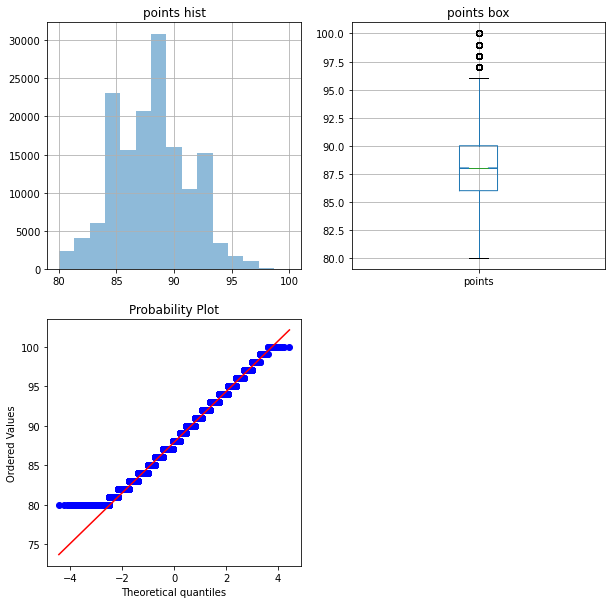

In [16]:
# coding=utf-8
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("points hist")
data['points'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("points box")
data['points'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['points'],dist="norm",plot=plt)
plt.show()


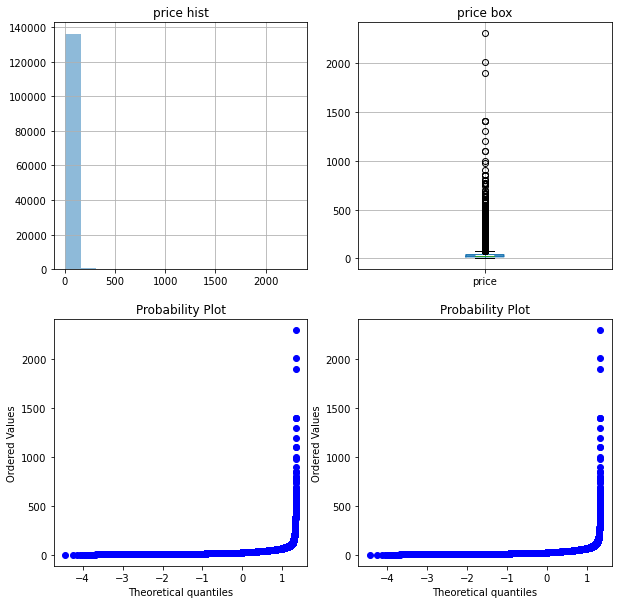

In [17]:
#绘制price的直方图、盒图、qq图
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("price hist")
data['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("price box")
data['price'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['price'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
pricewithooutnulldata = pd.DataFrame(data['price']) 
pricewithooutnulldata = pricewithooutnulldata.dropna()  
stats.probplot(data['price'],dist="norm",plot=plt)

plt.show()

### 由上图可以得出结论：
1.points属性分布符合正态分布，但不是完全正态分布

2.price属性分布不符合正态分布

# 数据缺失处理

In [18]:
#绘制表格查看数据缺失值并检验四种方案填充后是否还有缺失值
def missing_data(datatodel):
    missing_num = datatodel.isnull().sum()
    missing_percent = missing_num/datatodel.shape[0]*100
    concat_data = pd.concat([missing_num,missing_percent],axis=1,keys=['missing_num','missing_percent'])
    concat_data['Types'] = datatodel.dtypes
    return concat_data


由上表可以看出，数值型数据price存在缺失值

标称型数据country，designation,province,region_1,region_2存在缺失值

这里缺失的原因可能是由于未完全记录、遗漏或无法获取

## 方案一 缺失值剔除

In [19]:
del_null_data = data.copy(deep=True)
del_null_data = del_null_data.dropna()

In [20]:
missing_data(del_null_data)

,missing_num,missing_percent,Types
country,0,0.0,object
description,0,0.0,object
designation,0,0.0,object
points,0,0.0,int64
price,0,0.0,float64
province,0,0.0,object
region_1,0,0.0,object
region_2,0,0.0,object
variety,0,0.0,object
winery,0,0.0,object


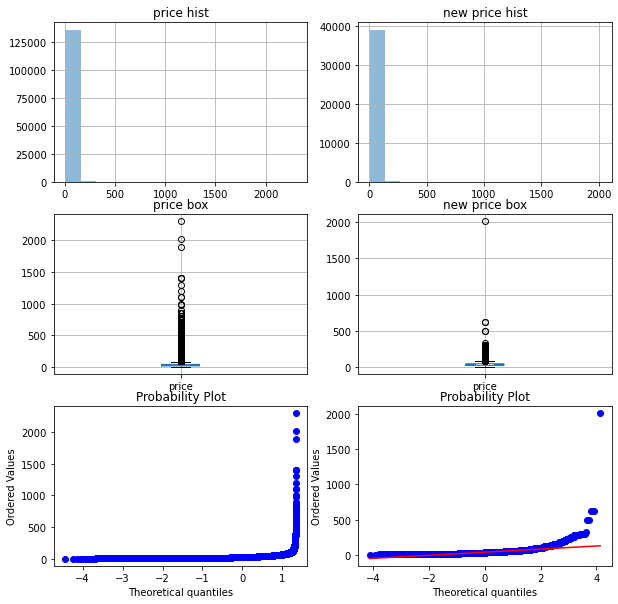

In [21]:
#可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("price hist")
data['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new price hist")
del_null_data['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("price box")
data['price'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new price box")
del_null_data['price'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['price'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['price'],dist="norm",plot=plt)

plt.show()

In [22]:
del_null_data[['price']].describe()  #缺失部分剔除后数据的5数概况

,price
count,39241.000000
mean,37.546316
std,26.716547
min,4.000000
25%,22.000000
50%,32.000000
75%,45.000000
max,2013.000000


## 用最高频率值来填补缺失值

In [23]:
#用最高频率来填补缺失值--此处使用深拷贝，否则会改变原值
fill_data_with_most_frequency = data.copy(deep=True)
#对price进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['price'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['price'] = fill_data_with_most_frequency['price'].fillna(top)

In [24]:
missing_data(fill_data_with_most_frequency)

,missing_num,missing_percent,Types
country,5,0.003313,object
description,0,0.000000,object
designation,45735,30.302127,object
points,0,0.000000,int64
price,0,0.000000,float64
province,5,0.003313,object
region_1,25060,16.603724,object
region_2,89977,59.615053,object
variety,0,0.000000,object
winery,0,0.000000,object


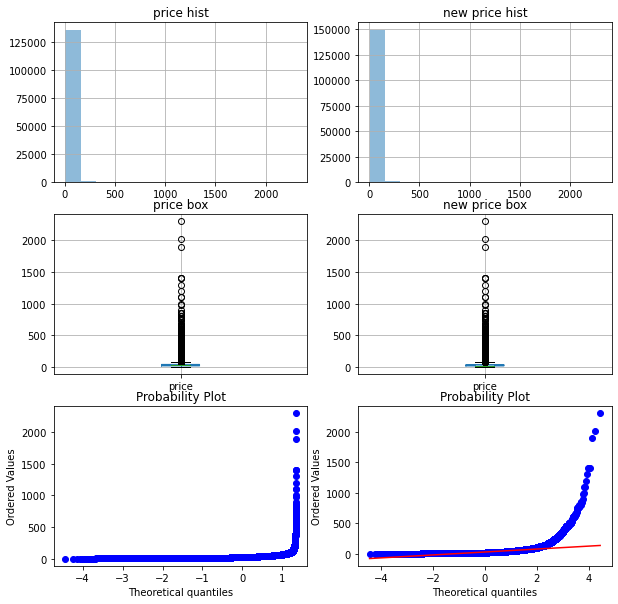

In [25]:
#可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("price hist")
data['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new price hist")
fill_data_with_most_frequency['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("price box")
data['price'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new price box")
fill_data_with_most_frequency['price'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['price'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(fill_data_with_most_frequency['price'],dist="norm",plot=plt)

plt.show()

In [26]:
#对填充后的新数据进行描述
fill_data_with_most_frequency[['price']].describe()

,price
count,150930.000000
mean,31.939966
std,34.840211
min,4.000000
25%,16.000000
50%,22.000000
75%,38.000000
max,2300.000000


## 通过属性的相关关系来填补缺失值

In [27]:
#查看相关的属性关系
data.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [28]:
#通过属性的相关关系来填补缺失值
target_data = data['price'].copy(deep=True)
source_data = data['points'].copy(deep=True)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = 104 - source_data[i]
    i=i+1


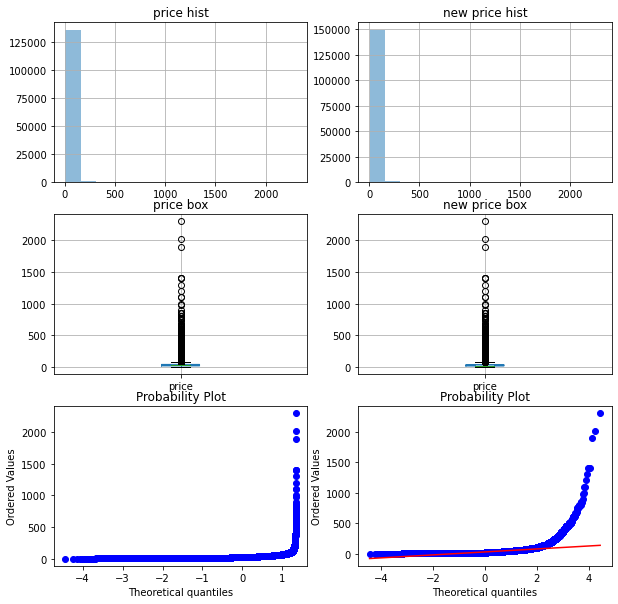

In [29]:
#可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("price hist")
data['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new price hist")
target_data.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("price box")
data['price'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new price box")
target_data.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['price'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(target_data,dist="norm",plot=plt)

plt.show()

In [30]:
target_data.describe()

count    150930.00000
mean         31.49576
std          35.03242
min           4.00000
25%          15.00000
50%          22.00000
75%          38.00000
max        2300.00000
Name: price, dtype: float64

## 通过对象的相似性填补缺失值

In [31]:
numeric_attr = ['price','points']
#查找两个对象间的相似性
#如果通过暴力法求解耗时耗力
#所以选择通过二分法查找的方法进行相似性选择

def find_dis_value(dataset, pos, numeric_attr):
    def dis_objs(tar_obj_index, sou_obj_index):
        tar_obj = dataset.iloc[tar_obj_index]
        sou_obj = dataset.iloc[sou_obj_index]
        dis_value = 0
        for column in tar_obj.index:
            if column == 'points':
                if (not math.isnan(tar_obj[column])) and (not math.isnan(sou_obj[column])):                 
                    dis_value += sou_obj[column] - tar_obj[column]                
                else:
                    dis_value += 9998
        return dis_value

    
    mindis = 9999
    result_pos = -1
    leftindex = 0;
    rightindex = dataset.shape[0]-1
    #二分查找返回最近距离的一个result_pos
    while leftindex<=rightindex:
        midindex = int((leftindex+rightindex)/2)
        tmpdis = dis_objs(pos,midindex)        
        if(tmpdis>0):
            rightindex = midindex-1            
        elif(tmpdis == 0):
            result_pos = midindex
            break;
        else:
            leftindex = midindex+1        
        if(tmpdis<mindis):
            result_pos = midindex  
    return result_pos




# 通过数据对象之间的相似性来填补缺失值
numical_datasets = pd.DataFrame(data[numeric_attr].copy(deep=True))

#对numical_datasets排序
numical_datasets.sort_values("points",inplace=True)
data_price = numical_datasets['price'].copy(deep=True)

print('空数据数量为:',data_price.isnull().sum())
length = numical_datasets.shape[0]
count=1;
for i in range(length):
    if math.isnan(numical_datasets['price'].iloc[i]):       
#         print('当前处理第'+str(count)+"个")
#         print(i,numical_datasets.iloc[i])  
        result_pos = find_dis_value(numical_datasets, i, numeric_attr)
#         print(result_pos,numical_datasets.iloc[result_pos])
        data_price.iloc[i] = data_price.iloc[result_pos]
#         print(i,data_price.iloc[i])
        count+=1

空数据数量为: 13695


In [32]:
print(data_price.isnull().sum())

0


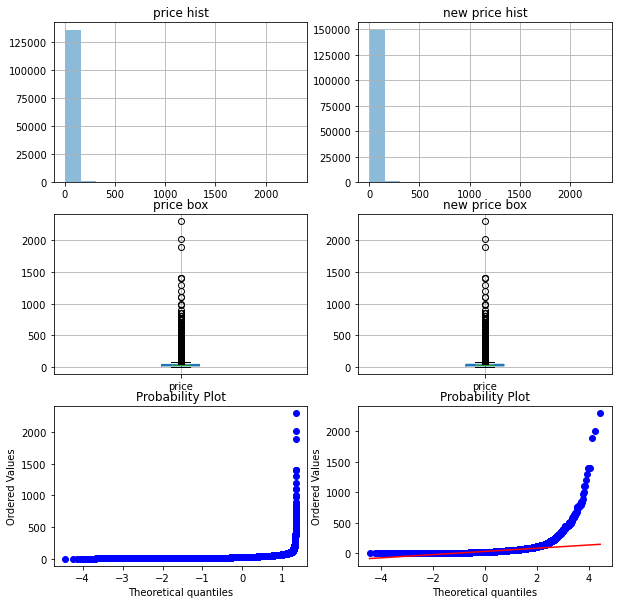

In [33]:
#可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("price hist")
data['price'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new price hist")
data_price.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("price box")
data['price'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new price box")
data_price.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['price'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(data_price,dist="norm",plot=plt)

plt.show()

In [34]:
data_price.describe()  # #通过数据对象之间的相似性来填补后数据的5数概况

count    150930.000000
mean         34.107434
std          36.281767
min           4.000000
25%          16.000000
50%          25.000000
75%          42.000000
max        2300.000000
Name: price, dtype: float64